<h1>Data Science Salary Data Analytics</h1>
<hr>
<br>

<h2>Data Analyst: Jodel Labios</h2>
<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('Data Science Salary 2021 to 2023.csv')

In [2]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [3]:
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


<hr>
<br>

<h1>Exploratory Data Analysis</h1
<br>

<br>

In [5]:

df['job_title'].count()

np.int64(3761)

<h3>Insigth: There are 3,761 unique job titles.</h3>
<br>

In [6]:
df.groupby(['work_year']) ['salary_in_usd'].mean()


work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

<h3>Insight: The average salary of data science in usd by year  2020 (92,302), 2021 (94,087), 2022 (133,379), 2023 (148,954)</h3>
<br>
<h2>Bar plot of salary of a data science by their experience</h2>

<Axes: xlabel='experience_level'>

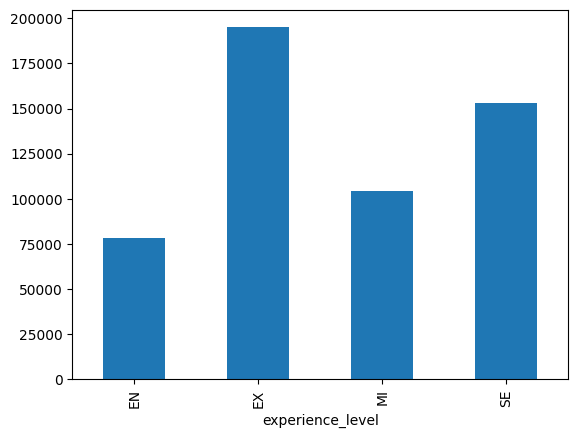

In [7]:
salary_level = df.groupby(['experience_level']) ['salary_in_usd'].mean()
salary_level.plot(kind="bar")

In [14]:
label = LabelEncoder()
df['experience_level_encoded'] = label.fit_transform(df['experience_level'])


features = ['work_year', 'experience_level_encoded']
X = df[features]
y = df['salary_in_usd']


X.head()

,work_year,experience_level_encoded
0,2023,0
1,2023,0
2,2023,0
3,2023,0
4,2023,0


In [15]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


In [16]:
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX
})


predicted_salaries = model.predict(future_data)


results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})
results

,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


<br>
<h3>1. Does your model make reasonable predictions? Why or why not?</h3>
<h3>- Not too resonable, because this model got only 0.15 score and it's too low </h3>
    
<h3>2. What are the limitations of using only `work_year` and `experience_level?</h3>
<h3>- The model only covers a small data, so only a slected data will be analyzed.</h3>

<h3>3. How could you improve this model? (Think: more features, better encoding, etc.)</h3>
<h3>- Add some features so that the model can be based on more data so that the model's output will be more reasonable and efficient </h3>

<h3>4. Why is **R² not enough** to trust your predictions? </h3>
<h3>- Not enough to trust, because this model got low score  </h3>